#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [18]:
dataset = pd.read_csv("https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv")
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [19]:
dataset.duplicated().sum()

3

Periksa apakah ada missing values

In [20]:
print(dataset.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


Periksa outlier dengan boxplot untuk setiap kolom feature

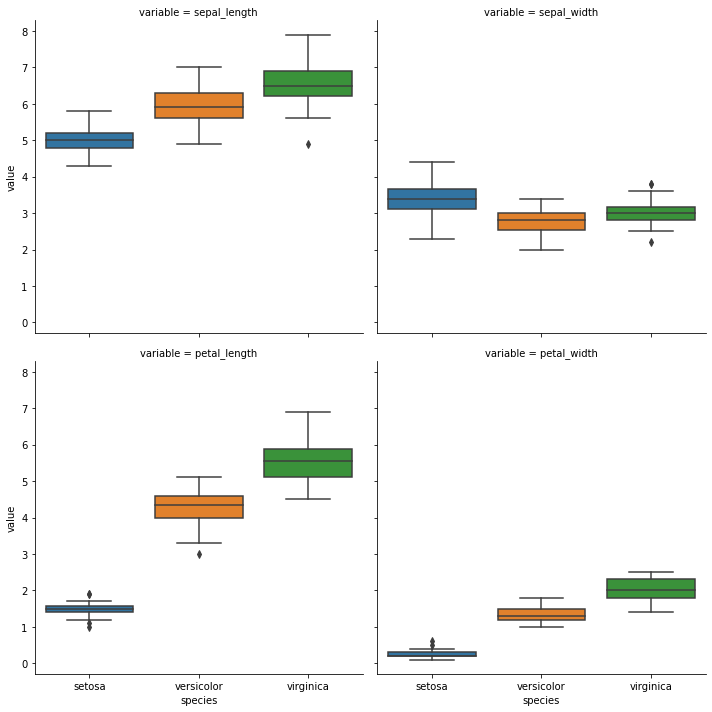

In [33]:
iris = dataset.melt(id_vars='species')
sns.catplot(data=iris, x='species', y='value',col='variable', kind='box', col_wrap=2)
plt.show()

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [34]:
X = dataset[['sepal_length','sepal_width','petal_length','petal_width']]
y = dataset['species']

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [36]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

print(X_train)
print(X_test)

[[-1.08593443  0.09813652 -1.24448561 -1.41148027]
 [ 0.2219428  -0.36672067  0.44627813  0.40699124]
 [-0.37254685 -1.06400644  0.38991934  0.01731878]
 [-1.20483236 -0.13429207 -1.3008444  -1.15169862]
 [-0.49144478  1.95756524 -1.35720319 -1.0218078 ]
 [-0.25364892 -0.59914926  0.6717133   1.05644535]
 [-0.25364892 -0.13429207  0.44627813  0.40699124]
 [-1.20483236  0.79542229 -1.01905044 -1.28158945]
 [-1.68042408 -0.36672067 -1.3008444  -1.28158945]
 [ 0.45973866 -0.59914926  0.61535451  0.79666371]
 [-1.44262822  1.26027947 -1.52627956 -1.28158945]
 [-0.84813857  1.72513665 -1.01905044 -1.0218078 ]
 [ 0.45973866 -0.36672067  0.33356055  0.1472096 ]
 [-0.9670365  -1.76129221 -0.23002736 -0.24246287]
 [-0.9670365   0.79542229 -1.18812682 -1.0218078 ]
 [ 0.69753452  0.09813652  1.00986605  0.79666371]
 [-0.49144478 -0.13429207  0.44627813  0.40699124]
 [-0.72924064  1.02785088 -1.24448561 -1.28158945]
 [ 0.34084073 -0.13429207  0.6717133   0.79666371]
 [ 0.69753452 -0.59914926  1.06

#Logistic Regression

Bangun model dan ukur accuracy nya

In [37]:
from sklearn.metrics import accuracy_score
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
X_pred = classifier.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, X_pred))

Accuracy Score:  0.9333333333333333


Uji model dengan dataset test

In [38]:
y_pred = classifier.predict(X_test)
print(y_pred)

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor']


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [40]:
model = GaussianNB()

Uji hasil model dengan data test

In [41]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(y_pred)

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[3 0 0]
 [0 8 0]
 [0 1 3]]
Accuracy Score:  0.9333333333333333


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [43]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

Uji model dengan data test

In [44]:
y_pred = classifier.predict(X_test)
print(y_pred)

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor']


Ukur akurasi dari model K-Nearest Neighbor

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
dataset = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", dataset)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[3 0 0]
 [0 8 0]
 [0 1 3]]
Accuracy Score:  0.9333333333333333


#Kesimpulan
Dari klasifikasi 3 model diatas memiliki nilai akurasi yang sama dari masing-masing setiap model